In [506]:
import tensorflow as tf
import os
import shutil
nltk.download('stopwords')
nltk.download('wordnet')


import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
import pickle
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /home/muody/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/muody/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [507]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1.tar.gz", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

In [508]:
print(dataset)
print(dataset_dir)

./aclImdb_v1.tar.gz
./aclImdb


In [509]:
os.listdir(dataset_dir)

['test', 'README', 'imdb.vocab', 'imdbEr.txt', 'train']

In [510]:
! ls ./aclImdb

imdbEr.txt  imdb.vocab	README	test  train


In [511]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'unsupBow.feat',
 'neg',
 'pos',
 'urls_unsup.txt',
 'unsup',
 'urls_neg.txt',
 'urls_pos.txt']

In [512]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
    print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [513]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [514]:
batch_size = 8
seed = 42

imdb_reviews = 'aclImdb/train'
imdb_reviews_test = 'aclImdb/test'

medical_notes_dir = '/home/muody/data/medicalnotes/dataset/train-data'
medical_notes_dir_test = '/home/muody/data/medicalnotes/dataset/unlabeled-test-data'

raw_data = imdb_reviews
test_data = imdb_reviews_test

raw_data = medical_notes_dir
test_data = medical_notes_dir


raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    raw_data, 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 826 files belonging to 5 classes.
Using 661 files for training.


In [515]:
train_dir

'./aclImdb/train'

In [516]:
!ls /home/muody/data/medicalnotes/dataset/train-data/Gastroenterology
! file -i /home/muody/data/medicalnotes/dataset/train-data/Gastroenterology/*.txt

1007.txt  1084.txt  1184.txt  1313.txt	1451.txt  1526.txt  1622.txt  1721.txt
1014.txt  1085.txt  1186.txt  1316.txt	1452.txt  1527.txt  1630.txt  1724.txt
1015.txt  1093.txt  1200.txt  1332.txt	1464.txt  1533.txt  1643.txt  1737.txt
1019.txt  1094.txt  1209.txt  1336.txt	1465.txt  1534.txt  1645.txt  1738.txt
1020.txt  1100.txt  1210.txt  1338.txt	1468.txt  1536.txt  1648.txt  1740.txt
1022.txt  1102.txt  1213.txt  1348.txt	1473.txt  1537.txt  1649.txt  1746.txt
1023.txt  1106.txt  1237.txt  1352.txt	1475.txt  1544.txt  1652.txt  1756.txt
1034.txt  1107.txt  1239.txt  1353.txt	1478.txt  1548.txt  1657.txt  1757.txt
1035.txt  1109.txt  1246.txt  1365.txt	1487.txt  1559.txt  1658.txt  1765.txt
1038.txt  1116.txt  1248.txt  1366.txt	1491.txt  1562.txt  1661.txt  1771.txt
1044.txt  1129.txt  1257.txt  1379.txt	1497.txt  1577.txt  1666.txt  1777.txt
1048.txt  1131.txt  1258.txt  1381.txt	1498.txt  1580.txt  1667.txt  1791.txt
1056.txt  1144.txt  1259.txt  1391.txt	1500.txt  1591.txt  1676.

/home/muody/data/medicalnotes/dataset/train-data/Gastroenterology/1421.txt: text/plain; charset=us-ascii
/home/muody/data/medicalnotes/dataset/train-data/Gastroenterology/1429.txt: text/plain; charset=us-ascii
/home/muody/data/medicalnotes/dataset/train-data/Gastroenterology/1438.txt: text/plain; charset=us-ascii
/home/muody/data/medicalnotes/dataset/train-data/Gastroenterology/1451.txt: text/plain; charset=us-ascii
/home/muody/data/medicalnotes/dataset/train-data/Gastroenterology/1452.txt: text/plain; charset=us-ascii
/home/muody/data/medicalnotes/dataset/train-data/Gastroenterology/1464.txt: text/plain; charset=us-ascii
/home/muody/data/medicalnotes/dataset/train-data/Gastroenterology/1465.txt: text/plain; charset=us-ascii
/home/muody/data/medicalnotes/dataset/train-data/Gastroenterology/1468.txt: text/plain; charset=us-ascii
/home/muody/data/medicalnotes/dataset/train-data/Gastroenterology/1473.txt: text/plain; charset=us-ascii
/home/muody/data/medicalnotes/dataset/train-data/Gastro

In [517]:
import numpy as np

train_dir = '/home/muody/data/medicalnotes/dataset/train-data/'
train_data = tf.keras.preprocessing.text_dataset_from_directory(
    train_dir, 
    batch_size=1, 
    validation_split=0.2, 
    subset='training', 
    seed=42)

train_data = np.stack(list(train_data))


Found 826 files belonging to 5 classes.
Using 661 files for training.


In [518]:
train_data

text_l = []
label_l = []
for row in range(len(train_data)):
    try:
        text_l.append(train_data[row][0][0].decode('us-ascii'))
        label_l.append(train_data[row][1][0])
    except:
        continue

df = pd.DataFrame(zip(text_l, label_l), columns=['text', 'label']).head(100)
df

,text,label
0,\n\n\n\n\n<B>PREOPERATIVE DIAGNOSIS:</B> Squamous cell carcinoma of right temporal bone/middle ear space.\n\n<B>POSTOPERATIVE DIAGNOSIS: </B> Squamous cell carcinoma of right temporal bone/middle ear space.\n\n<B>PROCEDURE: </B> Right temporal bone resection; rectus abdominis myocutaneous free flap for reconstruction of skull base defect; right selective neck dissection zones 2 and 3.\n\n<B>ANESTHESIA: </B> General endotracheal.\n\n<B>DESCRIPTION OF PROCEDURE: </B>The patient was brought i...,1
1,"\n\n\n\n\n<B>EXAM:</B> MRI head without contrast.\n\n<B>REASON FOR EXAM: </B> Severe headaches.\n\n<B>INTERPRETATION:</B> Imaging was performed in the axial and sagittal planes using numerous pulse sequences at 1 tesla. Correlation is made with the head CT of 4/18/05.\n\nOn the diffusion sequence, there is no significant bright signal to indicate acute infarction. There is a large degree of increased signal involving the periventricular white matter extending around to the subcortical re...",3
2,\n\n\n\n\n<B>PREOPERATIVE DIAGNOSES:</B>\n1. Right hydronephrosis.\n2. Right flank pain.\n3. Atypical/dysplastic urine cytology.\n\n<B>POSTOPERATIVE DIAGNOSES:</B>\n1. Right hydronephrosis.\n2. Right flank pain.\n3. Atypical/dysplastic urine cytology.\n4. Extrarenal pelvis on the right.\n5. No evidence of obstruction or ureteral/bladder lesions.\n\n<B>PROCEDURE PERFORMED:</B>\n1. Cystoscopy.\n2. Bilateral retrograde ureteropyelograms.\n3. Right ureteral barbotage for urine cytolog...,4
3,\n\n\n\n\n<B>PROCEDURE: </B> Placement of left ventriculostomy via twist drill.\n\n<B>PREOPERATIVE DIAGNOSIS:</B> Massive intraventricular hemorrhage with hydrocephalus and increased intracranial pressure.\n\n<B>POSTOPERATIVE DIAGNOSIS: </B> Massive intraventricular hemorrhage with hydrocephalus and increased intracranial pressure.\n\n<B>INDICATIONS FOR PROCEDURE: </B>The patient is a man with a history of massive intracranial hemorrhage and hydrocephalus with intraventricular hemorrhage. ...,1
4,"\n\n\n\n\n<B>PREOPERATIVE DIAGNOSIS:</B> Degenerative osteoarthritis, right knee.\n\n<B>POSTOPERATIVE DIAGNOSIS: </B> Degenerative osteoarthritis, right knee.\n\n<B>PROCEDURE PERFORMED: </B>Right knee total arthroplasty.\n\n<B>ANESTHESIA: </B> The procedure was done under a subarachnoid block anesthetic in the supine position with a tourniquet utilized.\n\n<B>TOTAL TOURNIQUET TIME: </B> Approximately 90 minutes.\n\n<B>SPECIFICATIONS: </B> The entire procedure is done in the inpatient operat...",2
...,...,...
95,"\n\n\n\n\n<B>OPERATIVE PROCEDURES: </B> Colonoscopy and biopsies, epinephrine sclerotherapy, hot biopsy cautery, and snare polypectomy.\n\n<B>PREOPERATIVE DIAGNOSES:</B>\n1. Colon cancer screening.\n2. Family history of colon polyps.\n\n<B>POSTOPERATIVE DIAGNOSES:</B>\n1. Multiple colon polyps (5).\n2. Diverticulosis, sigmoid colon.\n3. Internal hemorrhoids.\n\n<B>ENDOSCOPE USED: </B> EC3870LK.\n\n<B>BIOPSIES: </B>Biopsies taken from all polyps. Hot biopsy got applied to one. Epineph...",0
96,\n\n\n\n\n<B>PREOPERATIVE DIAGNOSIS (ES):</B>\n1. Cholelithiasis.\n2. Cholecystitis.\n\n<B>POSTOPERATIVE DIAGNOSIS (ES):</B>\n1. Acute perforated gangrenous cholecystitis.\n2. Cholelithiasis.\n\n<B>PROCEDURE:</B>\n1. Attempted laparoscopic cholecystectomy.\n2. Open cholecystectomy.\n\n<B>ANESTHESIA:</B> General endotracheal anesthesia.\n\n<B>COUNTS:</B> Correct.\n\n<B>COMPLICATIONS:</B> None apparent.\n\n<B>ESTIMATED BLOOD LOSS:</B> 275 mL.\n\n<B>SPECIMENS:</B>\n1. Gallbladder.\n2. Lymph nod...,0
97,"\n\n\n\n\n<B>HISTORY OF PRESENT ILLNESS: </B> The patient is a 62-year old male with a Gleason score 8 adenocarcinoma of the prostate involving the left and right lobes. He has a PSA of 3.1, with a prostate gland size of 41 grams. This was initially found on rectal examination with a nodule on the right side of the prostate, showing enlargement relative to the left. He has undergone evaluation with a bone scan that showed a right parietal lesion uptake and was

In [519]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [520]:
def clean_text(text, remove_stopwords=True):
    '''Text Preprocessing '''
    
    # Convert words to lower case
    text = text.lower()
    
    # Expand contractions
    #if True:
    #    text = text.split()
    #    new_text = []
    #    for word in text:
    #        if word in contractions:
    #            new_text.append(contractions[word])
    #        else:
    #            new_text.append(word)
    #    text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', '', text)
    text = re.sub(r'<br />', '', text)
    text = re.sub(r'\'', '', text)
    text = re.sub(r'<b>', '', text)
    
    # remove stopwords
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    # Tokenize each word
    text =  nltk.WordPunctTokenizer().tokenize(text)
    
    return text

In [521]:
df['Text_Cleaned'] = list(map(clean_text, df.text))
def lemmatized_words(text):
    lemm = nltk.stem.WordNetLemmatizer()
    df['lemmatized_text'] = list(map(lambda word:
                                     list(map(lemm.lemmatize, word)),
                                     df.Text_Cleaned))
    

lemmatized_words(df.Text_Cleaned)

In [522]:
pd.set_option('max_colwidth', 500)
df[['text', 'label', 'Text_Cleaned', 'lemmatized_text']].sample(3)

,text,label,Text_Cleaned,lemmatized_text
26,"\n\n\n\n\n<B>PREOPERATIVE DIAGNOSIS:</B> Phimosis.\n\n<B>POSTOPERATIVE DIAGNOSES:</B> Phimosis.\n\n<B>OPERATIONS:</B> Circumcision.\n\n<B>ANESTHESIA: </B> LMA.\n\n<B>EBL:</B> Minimal.\n\n<B>FLUIDS: </B> Crystalloid.\n\n<B>BRIEF HISTORY: </B> This is a 3-year-old male, who was referred to us from Dr. X's office with phimosis. The patient had spraying of urine and ballooning of the foreskin with voiding. The urine seemed to have collected underneath the foreskin and then would slowly dri...",4,"[preoperative, diagnosis, phimosis, postoperative, diagnoses, phimosis, operations, circumcision, anesthesia, lma, ebl, minimal, fluids, crystalloid, brief, history, 3yearold, male, referred, us, dr, xs, office, phimosis, patient, spraying, urine, ballooning, foreskin, voiding, urine, seemed, collected, underneath, foreskin, would, slowly, drip, options, dorsal, slit, circumcision, watchful, waiting, gently, pulling, foreskin, back, discussed, risk, anesthesia, bleeding, infection, pain, sca...","[preoperative, diagnosis, phimosis, postoperative, diagnosis, phimosis, operation, circumcision, anesthesia, lma, ebl, minimal, fluid, crystalloid, brief, history, 3yearold, male, referred, u, dr, x, office, phimosis, patient, spraying, urine, ballooning, foreskin, voiding, urine, seemed, collected, underneath, foreskin, would, slowly, drip, option, dorsal, slit, circumcision, watchful, waiting, gently, pulling, foreskin, back, discussed, risk, anesthesia, bleeding, infection, pain, scarring..."
94,"\n\n\n\n\n<B>CHIEF COMPLAINT:</B> Right middle finger triggering and locking, as well as right index finger soreness at the PIP joint.\n\n<B>HISTORY OF OCCUPATIONAL INJURY OR ILLNESS:</B> The patient has been followed elsewhere, and we reviewed his records. Essentially, he has had a trigger finger and a mucocyst, and he has had injections. This has been going on for several months. He is now here for active treatment because the injections were not helpful, nonoperative treatment has no...",2,"[chief, complaint, right, middle, finger, triggering, locking, well, right, index, finger, soreness, pip, joint, history, occupational, injury, illness, patient, followed, elsewhere, reviewed, records, essentially, trigger, finger, mucocyst, injections, going, several, months, active, treatment, injections, helpful, nonoperative, treatment, worked, would, like, move, forward, order, prevent, keeping, locking, causing, pain, referred, evaluation, regarding, significant, past, medical, surgica...","[chief, complaint, right, middle, finger, triggering, locking, well, right, index, finger, soreness, pip, joint, history, occupational, injury, illness, patient, followed, elsewhere, reviewed, record, essentially, trigger, finger, mucocyst, injection, going, several, month, active, treatment, injection, helpful, nonoperative, treatment, worked, would, like, move, forward, order, prevent, keeping, locking, causing, pain, referred, evaluation, regarding, significant, past, medical, surgical, h..."
44,"\n\n\n\n\n<B>PREOPERATIVE DIAGNOSIS: </B> Morbid obesity.\n\n<B>POSTOPERATIVE DIAGNOSIS: </B>Morbid obesity.\n\n<B>PROCEDURE: </B> Laparoscopic antecolic antegastric Roux-en-Y gastric bypass with EEA anastomosis.\n\n<B>ANESTHESIA: </B> General with endotracheal intubation.\n\n<B>INDICATION FOR PROCEDURE: </B> This is a 30-year-old female, who has been overweight for many years. She has tried many different diets, but is unsuccessful. She has been to our Bariatric Surgery Seminar, received...",0,"[preoperative, diagnosis, morbid, obesity, postoperative, diagnosis, morbid, obesity, procedure, laparoscopic, antecolic, antegastric, rouxeny, gastric, bypass, eea, anastomosis, anesthesia, general, endotracheal, intubation, indication, procedure, 30yearold, female, overweight, many, years, tried, many, different, diets, unsuccessful, bariatric, surgery, seminar, received, handouts, signed, consent, risks, benefits, procedure, explained, 

In [523]:
df['label'] = df['label'] == 3

In [524]:
bow_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
x = bow_converter.fit_transform(df['Text_Cleaned'])

words = bow_converter.get_feature_names()
len(words)

5849

In [525]:
bigram_converter = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[2,2], lowercase=False) 
x2 = bigram_converter.fit_transform(df['Text_Cleaned'])
bigrams = bigram_converter.get_feature_names()
len(bigrams)

22244

In [526]:
bigrams[-10:]

['zocor 1',
 'zocor prilosec',
 'zofran 15',
 'zolpidem 10',
 'zonegran 200',
 'zonegran helped',
 'zonegran last',
 'zonegran physical',
 'zonegran therapy',
 'zones 2']

In [527]:
trigram_converter = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False) 
x3 = trigram_converter.fit_transform(df['Text_Cleaned'])
trigrams = trigram_converter.get_feature_names()
len(trigrams)

26319

In [528]:
trigrams[:10]

['0 2 gated',
 '0 ethibond suture',
 '0 good stream',
 '0 vicryl stick',
 '0 vicryl suture',
 '0035 glidewire 26',
 '0035 glidewire placed',
 '0038 guidewire passed',
 '0038 tefloncoated guidewire',
 '004 white count']

In [529]:
print(len(words), len(bigrams), len(trigrams))

5849 22244 26319


<IPython.core.display.Javascript object>


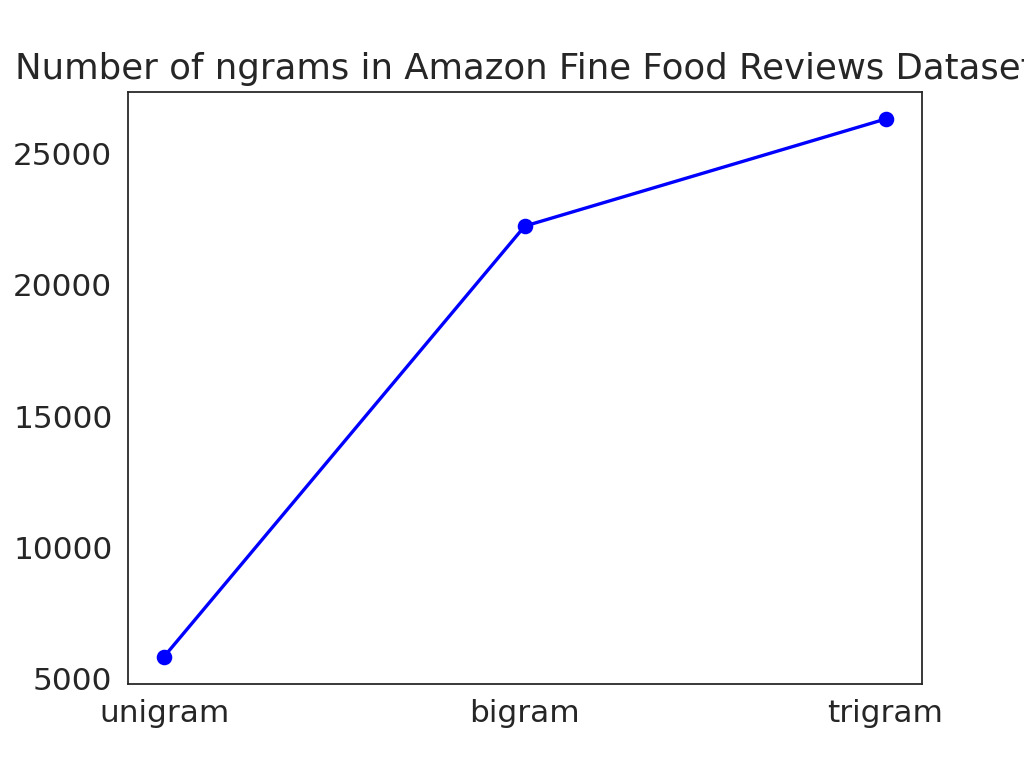

In [530]:
sns.set_style("white")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='blue')
plt.plot(counts, 'bo')
#plt.margins(0.1)
plt.ticklabel_format(style = 'plain')
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in Amazon Fine Food Reviews Dataset', {'fontsize':16})
plt.show()

In [531]:
training_data, test_data = sklearn.model_selection.train_test_split(df, train_size = 0.7, random_state=42)

In [532]:
print(training_data.shape)
print(test_data.shape)

(70, 4)
(30, 4)


In [533]:
bow_transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False)

In [534]:
X_tr_bow = bow_transform.fit_transform(training_data['Text_Cleaned'])
print(len(bow_transform.vocabulary_))
print(X_tr_bow.shape)
X_te_bow = bow_transform.transform(test_data['Text_Cleaned'])
y_tr = training_data['label']
y_te = test_data['label']

17678
(70, 17678)


In [535]:
tfidf_transform = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_transform.fit_transform(X_tr_bow)
X_te_tfidf = tfidf_transform.transform(X_te_bow)

In [536]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    model = LogisticRegression(C=_C).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)
    return model

model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
model_tfidf = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
bow_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
tfidf_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5,
                                   param_grid=param_grid_)
bow_search.fit(X_tr_bow, y_tr)

Test Score with bow features 0.8
Test Score with tf-idf features 0.8


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [537]:
model_tfidf.coef_
dir(X_tr_bow)

['__abs__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__round__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_add_dense',
 '_add_sparse',
 '_arg_min_or_max',
 '_arg_min_or_max_axis',
 '_asindices',
 '_binopt',
 '_cs_matrix__get_has_canonical_format',
 '_cs_matrix__get_sorted',
 '_cs_matrix__set_has_canonical_format',
 '_cs_matr

In [538]:
pd.DataFrame(X_tr_bow.toarray(), columns=bow_transform.get_feature_names())

,0 2 gated,0 ethibond suture,0 good stream,0 vicryl suture,0035 glidewire 26,0035 glidewire placed,0038 guidewire passed,0038 tefloncoated guidewire,0045 kirschner wire,010 pain 48hour,...,zlengthening completed proximally,zlengthening done medial,zocor 1 mg,zocor prilosec allergies,zolpidem 10 mg,zonegran 200 mg,zonegran helped pain,zonegran last visit,zonegran physical examination,zonegran therapy effective
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [539]:
model_bow.coef_.shape

(1, 17678)

In [540]:
len(bow_transform.get_feature_names())

17678

In [541]:
pd.DataFrame(zip(bow_transform.get_feature_names(), model_bow.coef_[0])).sort_values(by=1, ascending=False).head(10)

,0,1
10002,multiple images skull,0.212392
5612,evidence craniosynostosis radiographic,0.212392
7589,images skull evaluated,0.212392
3166,central canal neural,0.150542
10212,neural foramina patent,0.146230
2954,canal neural foramina,0.146230
10069,myocardial perfusion imaging,0.140841
6167,findings multiple images,0.106196
6230,five images history,0.106196
5553,evaluated reveal radiographic,0.106196
